# **Map SalishSea**

In [1]:
%matplotlib qt
import numpy as np
import xarray as xr
import os
from matplotlib import pyplot as plt, animation, rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as mcolors
from cartopy import crs, feature
import cmocean


cmap = cmocean.cm.deep

## Paths

In [2]:
# Define paths
paths = {
    'NEMO': '/results2/SalishSea/nowcast-green.201905/',
    'coords': '/Users/jvalenti/MOAD/SSC_masks/coordinates_seagrid_SalishSea201702.nc',
    'mask': '/Users/jvalenti/MOAD/SSC_masks/mesh_maskBat201702.nc',
    'out': '/Users/jvalenti/MOAD/analysis-jose/notebooks/results/',
}

## Simulation

In [3]:
coords = xr.open_dataset(paths['coords'], decode_times=False)
mask = xr.open_dataset(paths['mask'])

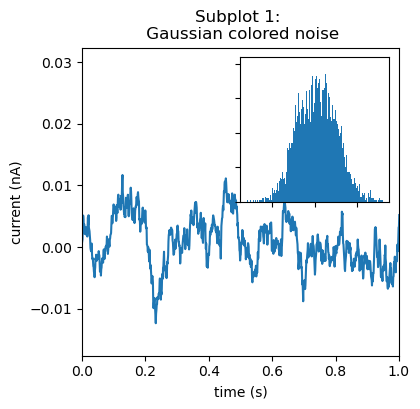

In [5]:
# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000]/0.05)               # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)]*dt  # colored noise

fig = plt.figure(figsize=(9, 4),facecolor='white')
ax = fig.add_subplot(121)
# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Subplot 1: \n Gaussian colored noise')



axins = ax.inset_axes([0.5, 0.5, 0.47, 0.47])
axins.hist(s, 400)
#plt.title('Probability')
axins.set_xticklabels('')
axins.set_yticklabels('')
plt.show()

In [6]:
# # Make map
# blevels = list(np.arange(0,450,15))
# fig, ax = plt.subplots(figsize=(38, 16), subplot_kw={'projection': crs.Mercator()})
# ax.set_extent([-125.5, -122, 48, 50.5], crs=crs.PlateCarree())
# ax.add_feature(feature.GSHHSFeature('low', facecolor='lightgray',edgecolor='lightgray'),zorder=2)
# ax.add_feature(feature.RIVERS, edgecolor='k',zorder=5)
# #ax.add_feature(feature.OCEAN,zorder=1)
# im=ax.contourf(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:]*10,zorder=1,transform=crs.PlateCarree(),cmap=cmap,levels=blevels)
# #plt.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:]*10,zorder=1,transform=crs.PlateCarree(),colors='w',levels=blevels,linewidths=0.05)
# #plt.xticks(fontsize=14)
# #plt.yticks(fontsize=14)

# gl = ax.gridlines(
#     linestyle='--', color='gray', draw_labels=True,
#     xlocs=range(-125, -121), ylocs=range(47, 52),zorder=5)
# gl.top_labels, gl.right_labels = False, False

# cbar = fig.colorbar(im, location='bottom',aspect=60,shrink=0.3,pad=0.05)

# cbar.set_label('Depth [m]')

# ax.text(-0.05, 0.55, 'Latitude', va='bottom', ha='center',
#         rotation='vertical', rotation_mode='anchor',
#         transform=ax.transAxes, fontsize=14,weight="bold")
# ax.text(0.5, -0.05, 'Longitude', va='bottom', ha='center',
#         rotation='horizontal', rotation_mode='anchor',
#         transform=ax.transAxes, fontsize=14,weight="bold")

# #axins = ax.inset_axes([0.65, 0.75, 0.5, 0.5],projection=crs.PlateCarree())

# ax.set_extent([-160, -75, 65, 25], crs=crs.PlateCarree())
# ax.add_feature(feature.GSHHSFeature('intermediate', edgecolor='k', facecolor='lightgray'))
# ax.add_feature(feature.BORDERS,zorder=3)
# #plt.title('Probability')
# gl = axins.gridlines(crs=crs.PlateCarree(), draw_labels=True, xlocs=np.linspace(-150,-50,5), ylocs=np.linspace(55,35,3),
#                    linewidth=2, color='gray', alpha=0.5, linestyle='--')
# gl.xlabel_style = {'size': 25}
# gl.ylabel_style = {'size': 25}
# gl.bottom_labels, gl.left_labels = False, False

# plt.show()

# #plt.savefig("/Users/jvalenti/Desktop/baty.pdf")

In [4]:
# Make map
blevels = list(np.arange(0,450,5))
fig, ax = plt.subplots(figsize=(8.8, 13.2))
x = np.arange(0,398)
y = np.arange(0,898)
X,Y = np.meshgrid(x,y)
#ax.add_feature(feature.GSHHSFeature('high', facecolor='#DDDDDD',edgecolor='#DDDDDD'),zorder=2)
#ax.add_feature(feature.RIVERS, edgecolor='k',zorder=5)
#ax.add_feature(feature.OCEAN,zorder=1)
im=ax.contourf(X, Y, mask.bathym[0,:,:],zorder=1,cmap=cmap,levels=blevels)
ax.contourf(X, Y, mask.umask[0,0,:,:],zorder=2,cmap='gray',levels=[-1,0])
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)


cbar = fig.colorbar(im, location='bottom',aspect=60,shrink=1,pad=0.06)

cbar.set_label('Depth [m]')
ax.text(-0.09, 0.55, 'Box Number in Y', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14,weight="bold")
ax.text(0.5, -0.06, 'Box Number in X', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14,weight="bold")

plt.savefig("/Users/jvalenti/Desktop/domain.pdf")

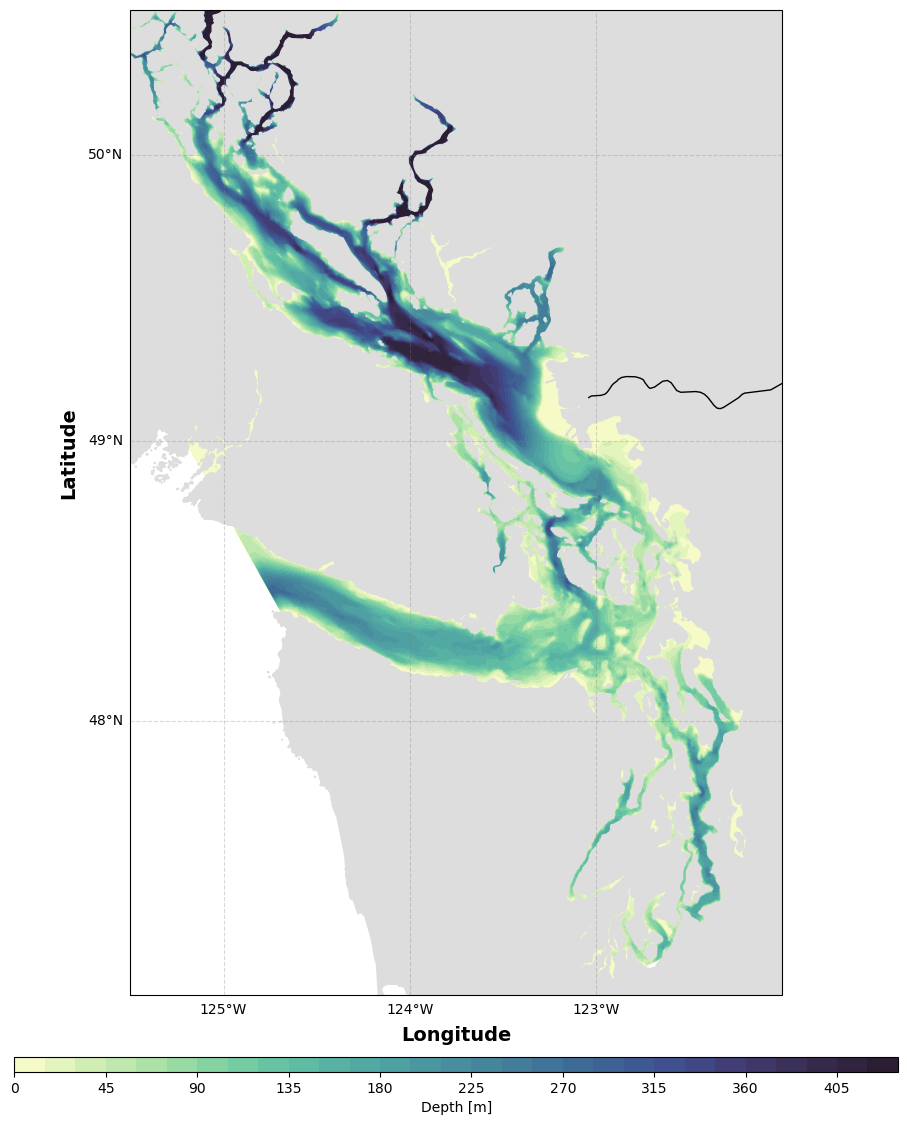

In [81]:
# Make map
blevels = list(np.arange(0,450,15))
fig, ax = plt.subplots(figsize=(38, 16), subplot_kw={'projection': crs.Mercator()})
ax.set_extent([-125.5, -122, 47, 50.5], crs=crs.PlateCarree())
ax.add_feature(feature.GSHHSFeature('high', facecolor='#DDDDDD',edgecolor='#DDDDDD'),zorder=2)
ax.add_feature(feature.RIVERS, edgecolor='k',zorder=5)
#ax.add_feature(feature.OCEAN,zorder=1)
im=ax.contourf(coords.nav_lon, coords.nav_lat, mask.bathym[0,:,:],zorder=1,transform=crs.PlateCarree(),cmap=cmap,levels=blevels)
#plt.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:]*10,zorder=1,transform=crs.PlateCarree(),colors='w',levels=blevels,linewidths=0.05)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

gl = ax.gridlines(
    linestyle='--',color='gray', draw_labels=True,
    xlocs=range(-125, -121), ylocs=range(47, 52),zorder=5,alpha=0.3)
gl.top_labels, gl.right_labels = False, False

cbar = fig.colorbar(im, location='bottom',aspect=60,shrink=0.3,pad=0.05)

cbar.set_label('Depth [m]')

ax.text(-0.08, 0.55, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14,weight="bold")
ax.text(0.5, -0.05, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=14,weight="bold")

plt.savefig("/Users/jvalenti/Desktop/baty.pdf")

In [9]:
states_provinces = feature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern


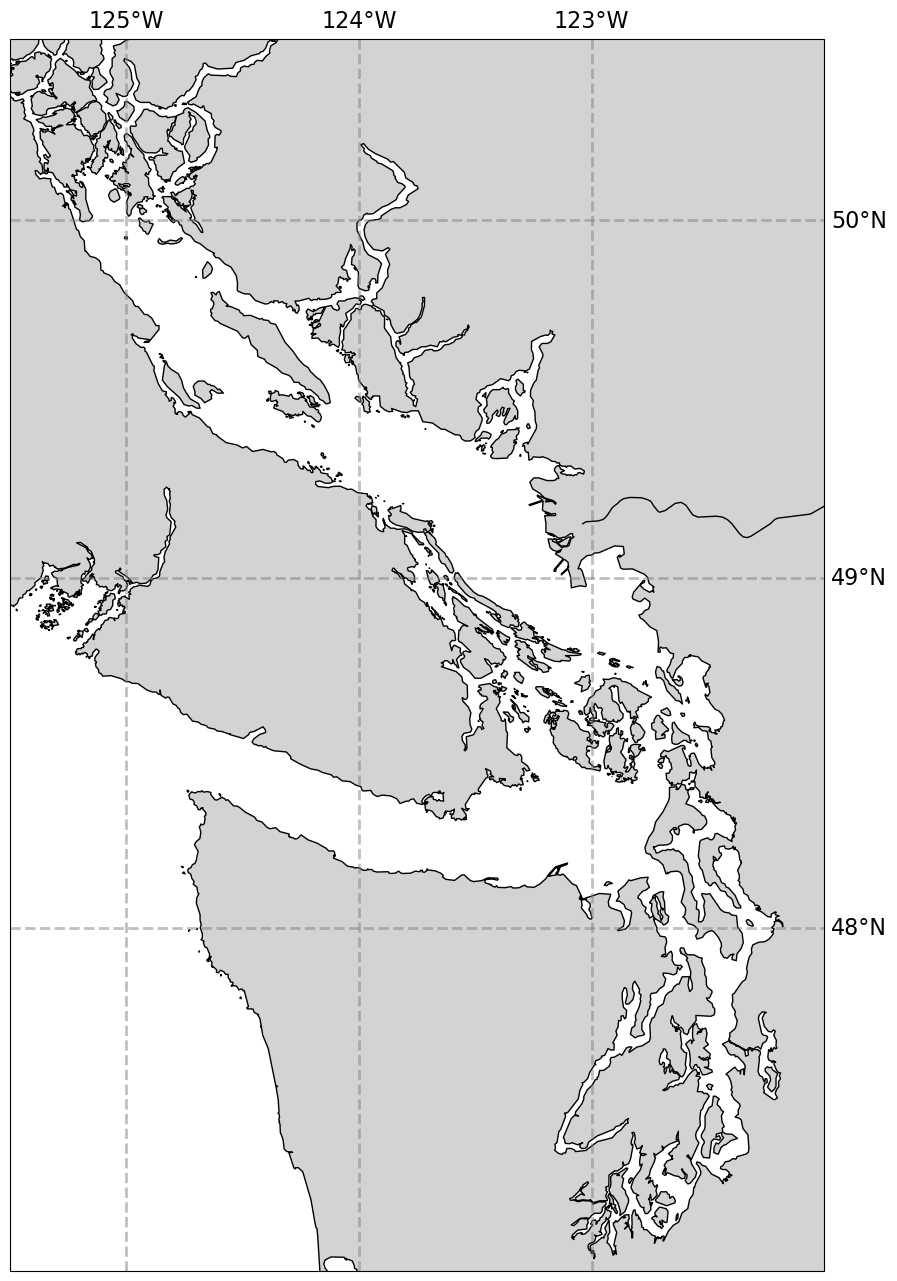

In [76]:
# Make map
fig, ax = plt.subplots(figsize=(20, 16), subplot_kw={'projection': crs.Mercator()})
ax.set_extent([-125.5, -122, 47, 50.5], crs=crs.PlateCarree())
ax.add_feature(feature.GSHHSFeature('high', edgecolor='k', facecolor='lightgray'))
#ax.add_feature(feature.OCEAN,zorder=1)
#ax.add_feature(feature.BORDERS,zorder=3)
ax.add_feature(feature.RIVERS, edgecolor='k',zorder=5)
gl = ax.gridlines(crs=crs.PlateCarree(), draw_labels=True, xlocs=range(-125, -121), ylocs=range(47, 52),
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')

gl.xlabel_style = {'size': 14}
gl.ylabel_style = {'size': 14}
gl.bottom_labels, gl.left_labels = False, False
plt.savefig("/Users/jvalenti/Desktop/map.pdf")